# 로지스틱 회귀

## 럭키백의 확률
- 구성품이 무작위인 럭키백에 대하여 각 생선이 담겨있을 확률을 표시해 보자

### 데이터 준비하기
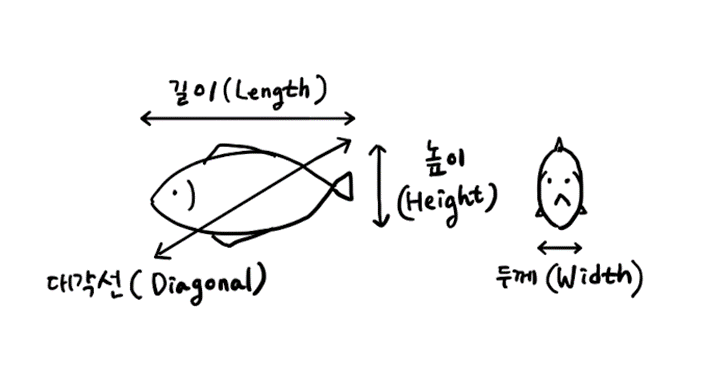

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


- 여러 클래스 중 하나를 분류(여러 생선 중 하나로 분류)이므로 다중 분류

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler



### k-최근접 이웃 분류기의 확률 예측
- 확률은 회귀?? 분류??
- 첫번째 결정
    - k-최근접 이웃을 활용해 찾아진 주변 이웃 클래스들의 비율을 확률로 출력
    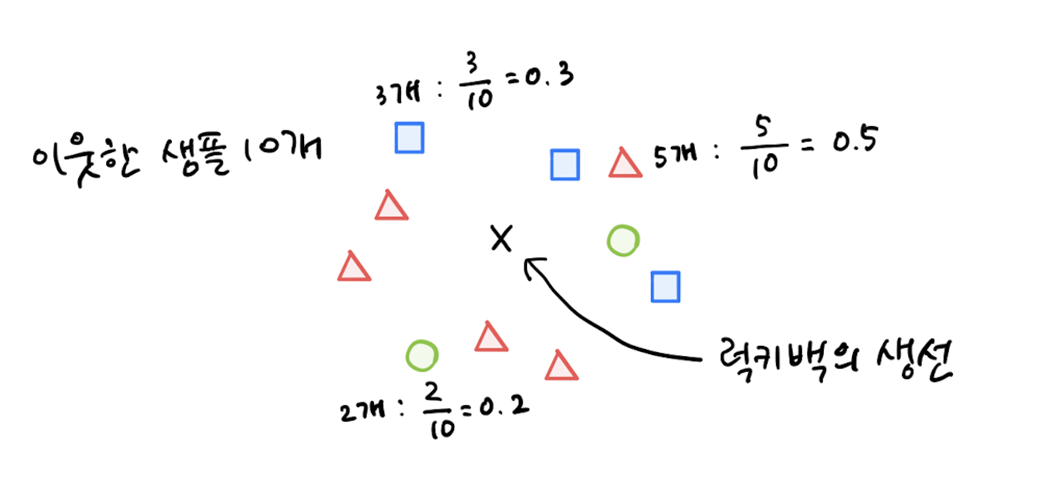

In [8]:
from sklearn.neighbors import KNeighborsClassifier



0.8907563025210085
0.85


In [9]:
# 분류 결정값 확인


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [10]:
# 테스트 데이터 앞 5개 데이터에 대한 분류 결과


['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


### 7개의 생선중 하나로 결정된 이유
- 7개 각 생선으로 분류될 확률을 먼저 계산하고 거기서 가장 확률값이 높은 생선으로 분류됨
    - 즉, Perch로 분류되었다고 해서 100프로 Perch라는 의미는 아님
        - Perch일 확률이 가장 높다는 의미를 갖는다
- sklearn은 각 분류 클래스의 예측 확률을 반환하는 함수인
    -  predict_proba()함수를 제공한다

In [12]:
import numpy as np



['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


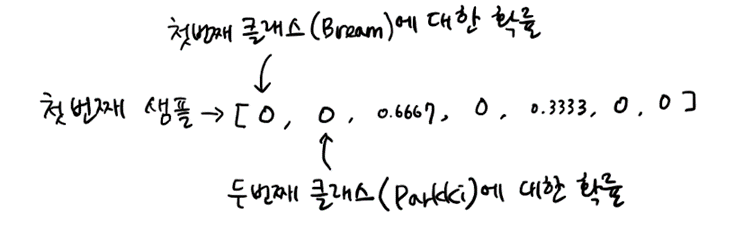

In [15]:
# 각 테스트 샘플에 대하여 최근접 이웃 결정값을 확인하면


[['Roach' 'Perch' 'Perch']]


- 3개의 최근접 이웃을 사용하기 때문에 가능한 확률은
    - 0/3, 1/3, 2/3, 3/3 이 전부임
    - 확률이라고 이야기 하기에는 많이 부족함

## 로지스틱 회귀
- 회귀식을 사용한 분류모델
   - 선형회귀와 동일하게 선형회귀식을 학습
   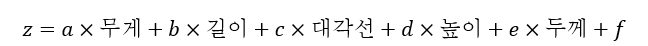
   - z는 어떤 값도 가능
       - 단 분류가 되려면 0~1 (또는 0~100%) 사이 값이 되어야 함
   - z가 아주 큰 음수일때는 0, z가 아주 큰 양수일때는 1로 바꾸는 방법은?
       - 시그모이드함수를 사용
       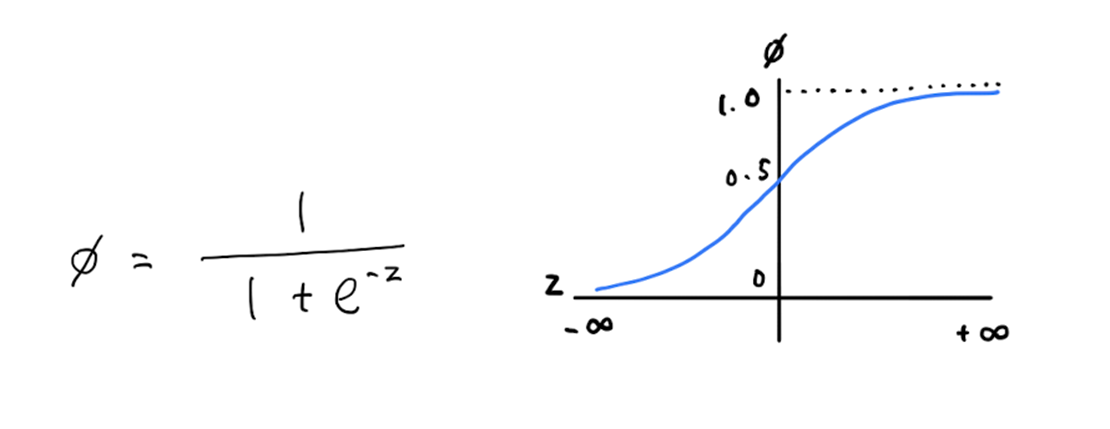
       - 선형 방정식의 축력 z의 음수를 사용해 자연상수 e를 거듭제곱하고 1을 더한 값의 역수를 취함
           - 이 계산식을 이용하면 오른쪽과 같은 그래프를 그릴 수 있음

In [18]:
# 시그모이드 함수 계산
import numpy as np
import matplotlib.pyplot as plt

# -5에서 +4.9까지 0.1간격의 난수 생성


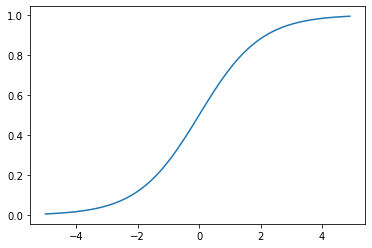

In [19]:
# z에 대하여 시그모이드 연산을 진행한 phi를 생성 후 그래프로 확인


In [24]:
# z값이 무한대로 커지면
# 무한대 표현은 불가능하므로 +- 5보다 상당히 커지면


C:\Users\student\AppData\Local\Temp\ipykernel_3092\2637122488.py:1: RuntimeWarning: overflow encountered in exp
  phi = 1 / (1 + np.exp(-z))


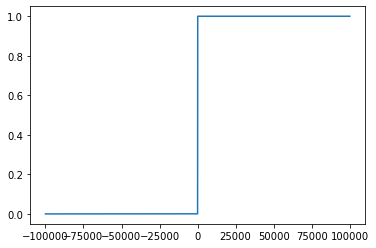

- 값이 음수/양수로 커질수록 0과 1에 완전 수렴

### 로지스틱 회귀로 이진 분류 수행하기

In [26]:
# 불리언 인덱싱


['A' 'C']


In [27]:
# 빙어와 도미만 추출
# 빙어 도미의 인덱스를 추출한후에

# 인덱스 이용 원 데이터 추출


In [28]:
#이진 분류(빙어/도미)


LogisticRegression()

In [29]:
# 5개의 샘플에 대한 예측


['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [30]:
# 5개의 샘플에 대한 예측 확률 확인


[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


- 100% 도미, 100%빙어로 나오는 경우는 거의 없음
    - 어떤 모델이든 분류에 대한 확률로 계산하고, 그 확률값이 가장 큰 클래스로 결정함
    - 이진 분류이므로 0.5가 넘어가는 클래스로 결정

In [19]:
# 클래스값을 알파벳순으로 정렬해서 사용
# 위 predict_proba()결과값은 앞 숫자가 Bream일 확률, 뒤 숫자가 Smelt일 확률임
# Smelt(빙어)가 양성클래스 (즉, 0일확률, 1일확률로 보면 됨)


['Bream' 'Smelt']


In [20]:
# 회귀계수와 절편 확인


[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

z=(-0.4037798*'Weight'+ -0.57620209*'Length'+ -0.66280298*'Diagonal' + -1.01290277*'Height' + -0.73168947*'Width') + -2.16155132

In [31]:
# 계산된 z값(5개의 샘플에대해)


[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


- 위 z값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있음
    - scipy 패키지의 expit()가 시그모이드 연산을 진행

In [33]:

from scipy.special import expit


# 두번째 샘플은 Smelt(빙어), 나머지 샘플은 모두 도미

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행하기
- 회귀알고리즘은 반복 알고리즘을 사용함
    - 반복적으로 계산하여  잔차가 적은 회귀식을 찾아내는 것이 목표임
    - max_iter는 반복 횟수(기본값은 100인데 100번 반복이 부족하다는 경고가 뜰 수 있음.) 충분한 반복을 위해 1000번으로 상향조정
        - 하이퍼파라미터기때문에 사이언티스트가 임의 조정한다
    - C는 로지스틱 규제 파라미터
        - 값이 작을 수록 규제가 커짐
        - 기본값은 1

In [40]:
# 규제를 좀 완화하기 위해 C=20, 충분한 반복 학습을 위해 max_iter=1000


LogisticRegression(C=20, max_iter=1000)

0.9327731092436975
0.925


- 훈련세트와 테스트세트에 대한 점수가 높고, 과대적합이나 과소적합으로 치우친것 같지 않음

In [24]:
# 5개 테스트 데이터로 예측


['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [42]:
# 예측 확률


[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [26]:
# 각 열에 대한 클래스 명


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0.000,0.014,0.841,0.000,0.136,0.007,0.003
1,0.000,0.003,0.044,0.000,0.007,0.946,0.000
2,0.000,0.000,0.034,0.935,0.015,0.016,0.000
3,0.011,0.034,0.306,0.007,0.567,0.000,0.076
4,0.000,0.000,0.904,0.002,0.089,0.002,0.001


In [27]:
# 5 개의 특징을 사용하므로 회귀계수는 5
# 7개의 분류에 대한 확률을 각각 계산해야 하므로 7행의 방정식이 생김
# 즉 z 값을 7개를 계산


(7, 5) (7,)


In [50]:
 #Bream의 z값을 계산할 방정식 회귀 계수
 #Whitefish의 z값을 계산할 방정식 회귀 계수

[-1.49001999 -1.02912482  2.59345218  7.70357843 -1.2007022 ]
[ 0.62149812 -2.32406483 -0.9066101   1.71599149  3.69369137]


In [51]:
# 테스트데이터에 대한 z값


[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


- 7개의 z값을 0이나 1로 변환해야 함
    - 시그모이드 함수는 2개의 값을 0~1로 변환하므로 사용 불가
    - 다중 값을 0~1로 변환시키는 함수는 softmax 함수임

### softmax
- s1= np.exp(-6.5)/sum([np.exp(-6.5),  np.exp(1.03),  np.exp(5.16), np.exp(-2.73) , np.exp(3.34), np.exp(0.33), np.exp(-0.63)])
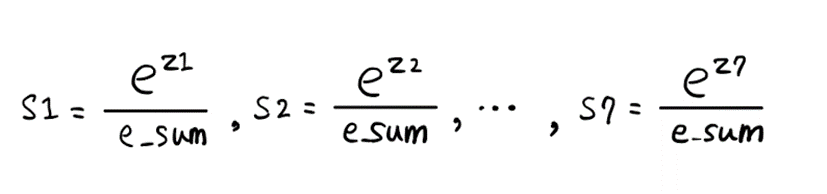
- s1에서 s7까지 모두 더하면 분자와 분모가 같아지므로 1이됨
    - 모든 생선의 확률의 합은 1이 되어야 하므로 

### 첫번째 샘플의 z값 : [ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
    - 가장 값이 큰 5.16의 확률 계산

0.840663756611841

- scipy의 softmax 함수를 이용하면 쉽게 계산 가능

In [29]:
from scipy.special import softmax



[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
